# 1.Download the dataset: Dataset

# 2. Import libraries and Load the dataset

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
file=pd.read_csv("Mall_Customers.csv")
data=pd.DataFrame(file)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 3. Perform Below Visualizations

#  Univariate Analysis

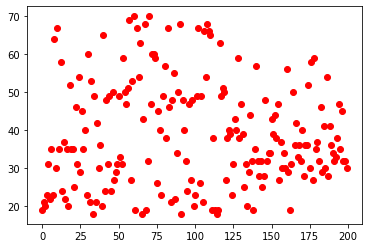

In [5]:
plt.scatter(data.index,data['Age'],color='red')
plt.show()

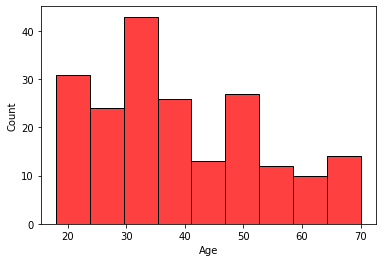

In [6]:
sns.histplot(data["Age"],color='red')

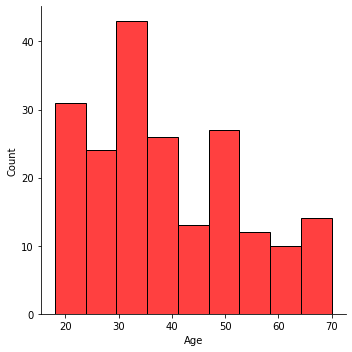

In [7]:
sns.displot(data["Age"],color='red')


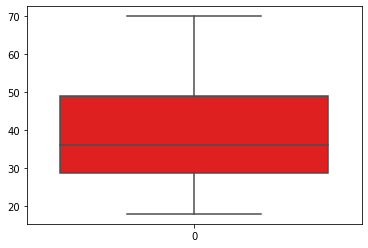

In [8]:
sns.boxplot(data["Age"],color='red')


# Bi-Variate Analysis

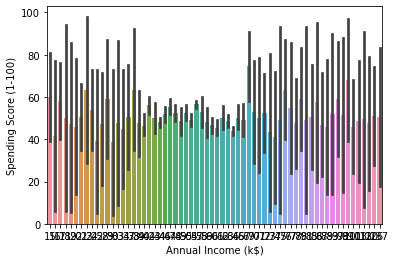

In [12]:
sns.barplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"])

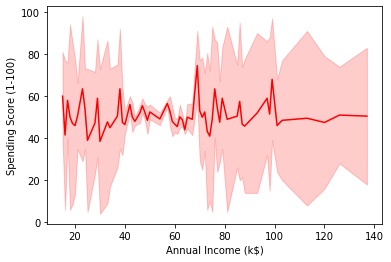

In [13]:
sns.lineplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"], color='red')


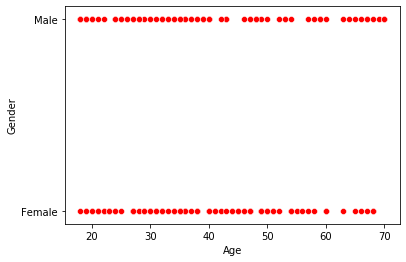

In [14]:
sns.scatterplot(x=data.Age,y=data.Gender,color='red')

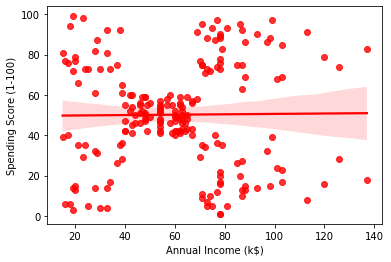

In [16]:
sns.regplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],color='red')


In [17]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# Multi-Variate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

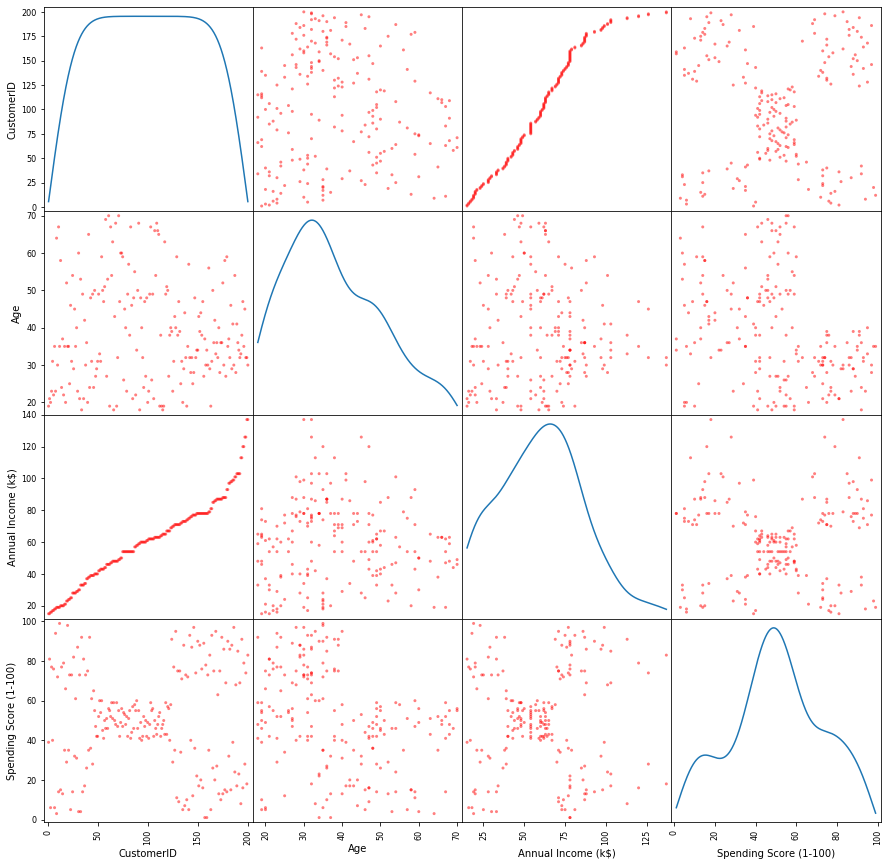

In [20]:
pd.plotting.scatter_matrix(data.loc[:,"CustomerID":"Spending Score (1-100)"],diagonal="kde",figsize=(15,15),color='red')
plt.show

# 4. Descriptive Statistics

In [21]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5. Dealing with missing values 

In [22]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6. Outliers

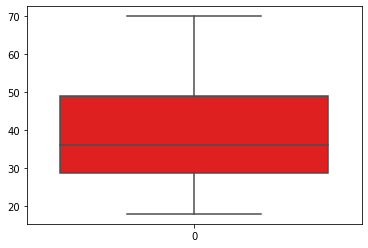

In [24]:
sns.boxplot(data['Age'],color='red')

In [30]:
print(data['Age'].mean())
print(data['Annual Income (k$)'].mean())
print(data["Spending Score (1-100)"].mean())

38.85
60.56
50.2


In [32]:
print(data['Age'].std())
print(data['Annual Income (k$)'].std())
print(data["Spending Score (1-100)"].std())

13.969007331558883
26.264721165271254
25.823521668370162


In [33]:
q=data.quantile(q=[0.75,0.5])
iqr=q.iloc[0]-q.iloc[1]
iqr

CustomerID                49.75
Age                       13.00
Annual Income (k$)        16.50
Spending Score (1-100)    23.00
dtype: float64

In [34]:
l=q.iloc[1]-(1.5*iqr)
l['Age']

16.5

In [35]:
u=q.iloc[1]+(1.5*iqr)
u['Age']

55.5

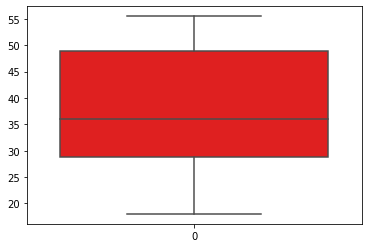

In [36]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))
sns.boxplot(data['Age'],color='red')

# 7.Check for Categorical columns and perform encoding

In [37]:
data['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [38]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19.0,15,39
1,2,0,21.0,15,81
2,3,1,20.0,16,6
3,4,1,23.0,16,77
4,5,1,31.0,17,40


# 8.Spilt Data into Dependent and Independent Variables

In [39]:
y=data['Gender']
y

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [40]:
x=data.drop(columns=['Gender'],axis=1)
x.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15,39
1,2,21.0,15,81
2,3,20.0,16,6
3,4,23.0,16,77
4,5,31.0,17,40


# 9. Clustering


In [43]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    error.append(kmeans.inertia_)

In [44]:
error

[965435.4087500001,
 377132.27362736274,
 262117.5443412849,
 186423.9380861838,
 149440.8544857126,
 114403.64248213927,
 94924.35571336876,
 78012.19027777779,
 70683.01392744682,
 64485.407191480015]

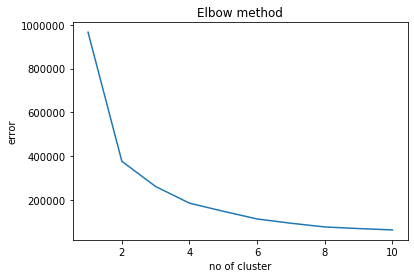

In [47]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of cluster')
plt.ylabel('error')
plt.show()

In [48]:
k_means_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [49]:
k_means_model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [50]:
clustered_data =k_means_model.predict(data)

# 10. Adding cluster data with the primary dataset

In [51]:
data['Clustered_data'] = pd.Series(clustered_data)

In [52]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustered_data
0,1,0,19.0,15,39,2
1,2,0,21.0,15,81,2
2,3,1,20.0,16,6,2
3,4,1,23.0,16,77,2
4,5,1,31.0,17,40,2


In [53]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustered_data
195,196,1,35.0,120,79,0
196,197,1,45.0,126,28,0
197,198,0,32.0,126,74,0
198,199,0,32.0,137,18,0
199,200,0,30.0,137,83,0


# 11. Splitting data into Dependent and Independent variables

In [54]:
y=data['Clustered_data']
y  

0      2
1      2
2      2
3      2
4      2
      ..
195    0
196    0
197    0
198    0
199    0
Name: Clustered_data, Length: 200, dtype: int32

In [55]:
X=data.drop(columns=['Clustered_data'],axis=1)
X.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19.0,15,39
1,2,0,21.0,15,81
2,3,1,20.0,16,6
3,4,1,23.0,16,77
4,5,1,31.0,17,40


# Scaling

In [59]:
names=x.columns
names

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [60]:
x = scale(x)

In [61]:
x

array([[-1.7234121 , -1.56143278, -1.73899919, -0.43480148],
       [-1.70609137, -1.39463532, -1.73899919,  1.19570407],
       [-1.68877065, -1.47803405, -1.70082976, -1.71591298],
       [-1.67144992, -1.22783785, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56064798, -1.66266033, -0.39597992],
       [-1.63680847, -1.31123658, -1.66266033,  1.00159627],
       [-1.61948775, -0.22705305, -1.62449091, -1.71591298],
       [-1.60216702, -1.22783785, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.48262098, -1.58632148, -1.83237767],
       [-1.56752558, -0.64404672, -1.58632148,  0.84631002],
       [-1.55020485,  1.48262098, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.22705305, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.48262098, -1.54815205, -1.36651894],
       [-1.49824268, -1.14443912, -1.54815205,  1.04041783],
       [-1.48092195, -0.06025558, -1.54815205, -1.44416206],
       [-1.46360123, -1.31123658, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

# 12.Splitting the data into Training and Testing

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [64]:
x_train.shape

(160, 4)

In [65]:
x_test.shape

(40, 4)

In [66]:
y_train.shape

(160,)

In [67]:
y_test.shape

(40,)

In [68]:
print(x_train.shape,x_test.shape)

(160, 4) (40, 4)


# 13. Model Building

In [70]:
model = RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_predict = model.predict(x_test)


In [72]:
y_predict_train = model.predict(x_train)


# 14. Model Training

In [74]:
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))

Training accuracy:  1.0


# 15. Model Testing

In [75]:
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Testing accuracy:  1.0


# 16. Performance measurement using evaluation metrics

In [76]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2
Clustered_data,,,
0,12,0,0
1,0,12,0
2,0,0,16


In [77]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

